In [212]:
import pandas as pd 
import numpy as np


In [237]:
data = pd.read_csv('finaldata.csv' , index_col=0)

In [238]:
data.shape

(1100367, 4)

In [214]:
data=data.dropna()

In [215]:
data

,activity,Acc-X,Acc-Y,Acc-Z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...
1100362,Walking,3.124783,8.580249,1.343975
1100363,Walking,3.124783,8.580249,1.343975
1100364,Walking,3.124783,8.580249,1.343975
1100365,Walking,3.124783,8.580249,1.343975


In [216]:
data=data.sample(frac=1).reset_index(drop=True)[0:30000]


In [217]:
import seaborn as sb

In [218]:
df=data[(data["Acc-X"]> -20) & (data["Acc-X"]< 20) & (data["Acc-Y"]< 20)  & (data["Acc-Y"]> -20)]

In [219]:
data.shape[0]- df.shape[0]

60

<AxesSubplot:xlabel='Acc-X', ylabel='Acc-Y'>

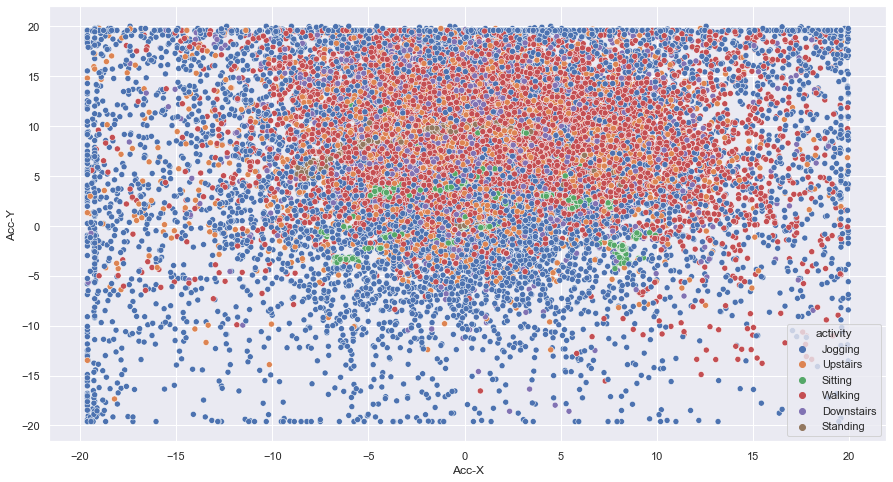

In [220]:
sb.set(rc = {'figure.figsize':(15,8)})
sb.scatterplot(x=df["Acc-X"] ,y=df["Acc-Y"] , hue=df["activity"])

In [221]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.drop(columns='activity' , axis= 1))

In [222]:
principalComponents

array([[  3.90261335,   1.04901245],
       [ -1.73043814,  -0.64084368],
       [  5.98872346,   8.30164173],
       ...,
       [-12.33178313,   8.50761745],
       [ 11.48192002,  -2.99896423],
       [  9.29535791,   3.54910347]])

In [223]:
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['X', 'Y'])

In [224]:
df

,activity,Acc-X,Acc-Y,Acc-Z
0,Jogging,-1.230000,2.410000,10.690000
1,Upstairs,1.140000,8.690000,-2.870000
2,Upstairs,4.710000,-2.640000,3.336985
3,Sitting,7.550000,1.800000,6.440000
4,Upstairs,17.430000,7.630000,10.923519
...,...,...,...,...
29994,Sitting,-4.060000,3.340000,8.660000
29995,Walking,1.310000,9.510000,-2.982856
29996,Jogging,14.370000,13.570000,-3.336985
29997,Walking,-7.740000,-1.920000,1.650000


<AxesSubplot:xlabel='X', ylabel='Y'>

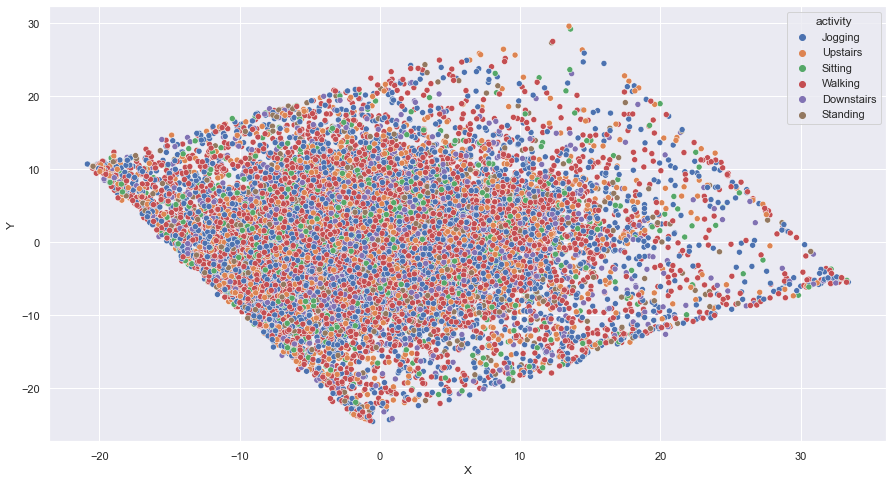

In [225]:
sb.scatterplot(x=principalDf.X ,y=principalDf.Y , hue=df["activity"])

In [226]:
principalDf["activity"]=df["activity"]

In [227]:
x=np.array(data.drop(columns='activity' , axis= 1))

In [228]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=data[["activity"]]
y = y.apply(le.fit_transform)
y.head()

,activity
0,1
1,4
2,4
3,2
4,4


In [229]:
y=y.values.reshape(y.shape[0])

In [230]:
from sklearn import svm

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30 , random_state=100)

In [232]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [233]:
X_train

array([[-0.21715622,  1.23607582,  0.0799665 ],
       [-0.09208188, -0.97882732, -0.08016197],
       [-0.78145049,  0.58399371, -0.01600274],
       ...,
       [ 1.02520134, -0.89761762, -0.14822702],
       [ 0.17269225,  0.48012223, -0.2847166 ],
       [-0.55391248,  1.70061219,  0.05731279]])

In [234]:
model=svm.SVC()

In [235]:
model.fit(X_train,y_train)

SVC()

In [236]:
acc=model.score(X_test , y_test)
acc

0.5476666666666666



*   sample : 10000 rows ; kernel  : rbf ; acc : 0.52
*   sample : 20000 rows ; kernel  : rbf ; acc : 0.57
*   sample : 10000 rows ; kernel  : linear ; acc : 0.54
*   sample : 20000 rows ; kernel  : linear ; acc : 0.43
*   sample : 20000 rows ; kernel  : poly ; acc : 0.44
*   sample : 20000 rows ; kernel  : sigmoid ; acc : 0.22

